# Numerische Methoden für Differentialgleichungen
## Aufgabenblatt 1
*gelöst von Stollmayer Max*

### Aufgabe 1
_Umschreiben eines Anfangswertproblems in ein System 1. Ordnung_

Das folgende System 2. Ordnung

\begin{cases}
    y''_1 = t^2 - y'_1 - y_2^2 \\
    y''_2 = t + y'_2 + y_1^3 \\
    y_1(0)=0, y'_1(0)=1, y_2(0)=1, y'_2(0)=0
\end{cases}

lässt sich durch das Einführen der neuen Variablen $y_3 := y'_1$ und $y_4 := y'_2$ in ein System 1. Ordnung umschreiben. Für die gilt nämlich $y'_3 = y''_1$ bzw. $y'_4 = y''_2.$ Das umgeschriebene System ist damit:

\begin{cases}
    y'_1 = y_3 \\
    y'_2 = y_4 \\
    y'_3 = t^2 - y_3 - y_2^2 \\
    y'_4 = t + y_4 + y_1^3 \\
    y_1(0)=0, y_2(0)=1, y_3(0)=1, y_4(0)=0
\end{cases}

D.h. Systeme höherer Ordnung lassen sich zu einem höher dimensionalen System 1. Ordnung umschreiben. Das erlaubt uns nun Verfahren für diese zu entwickeln, wie das Vorwärts-Euler-Verfahren im folgenden Teil.

### Aufgabe 2

_Implementierung des Vorwärts-Euler-Verfahrens für ODE Systeme 1. Ordnung_

#### Konstruktion

Wir betrachten das Cauchy-Problem
$\begin{cases} y'(t) = f(t,\, y(t)) \\ y(t_0) = y_0 \end{cases}$
für $f$ gleichmäßig Lipschitz-stetig auf $\mathbb{R}$ bzgl. $y.$

Durch Taylorentwicklung von $y$ bei $t$ erhalten wir $$y(t+h) = y(t) + h \ y'(t) + \frac{h^2 \ y''(\xi_h)}{2}$$ für eine Gitterkonstante $h>0$ und ein $\xi_h \in [t,\, t+h].$ Substituieren wir nun $y'(t_n) = f(t_n,\, y(t_n))$ und verlieren das Restglied, dann ergibt sich ein Schritt vom Vorwärts-Euler-Verfahren: $y(t+h) \approx y(t) + h \ f(t,\, y(t)).$ Diesen Schritt können wir nun auf die Punkte $t_n = t_0 + n\ h$ einer äquidistanten Zerlegung eines Intervalls $[a = t_0, t_N=b]$ anwenden und bekommen so das rekursive Verfahren $y_{n+1} = y_n + h \ f(t_n,\, y_n)$ mit $y_n \approx y(t_n).$

#### Konvergenz

Der lokale Abschneidefehler ist die Differenz zwischen der exakten Lösung und dem Resultat aus einem Schritt, der sich an einem Punkt $t_{n+1}$ ergibt, was genau durch das Restglied der Taylorentwicklung gegeben ist: $$\tau_{n+1}(h) := \frac{y(t_n+h) - y(t_n)}{h} + f(t_n,\, y(t_n)) = \frac{h \ y''(\xi_h)}{2}$$

Der globale Fehler besteht nun aus der Differenz zwischen der exakten Lösung und dem Resultat aus dem gesamten Verfahren von $0$ an, was wir in den lokalen Abschneidefehler und der Fehlerakkumulation aufteilen können:
$$e_{n+1}(h) := y(t_{n+1}) - y_{n+1} = (y(t_{n+1}) - y^*_{n+1}) ) + ( y^*_{n+1} - y_{n+1} ) = h\ \tau_{n+1}(h) + ( y^*_{n+1} - y_{n+1} ),$$
wobei $y^*_{n+1} = y(t_n) + h \ f(t_n,\, y(t_n))$ das Ergebnis nach einem Schritt bei genauem Anfangswert $y(t_n)$ ist.
Die Fehlerakkumulation lässt sich über die Lipschitzkonstante $L$ von $f$ abschätzen:
$$y^*_{n+1} - y_{n+1} = e_n(h) + h \ \big( f(t_n,\, y(t_n)) - f(t_n,\, y_n) \big) \le e_n(h) + h \ L \ |y(t_n) - y_n| \le (1+h\ L)\ |e_n(h)|$$
Und damit der globale Abschneidefehler:
\begin{align*}
    |e_{n+1}(h)| &\le \tau_{n+1} + (1+h\ L)\ |e_n(h)| \\
    &\le \tau_{n+1} + (1+h\ L)\ (\tau_n + (1+h\ L)\ |e_{n-1}(h)|) \\
    &\le \dots \\
    &\le \sum_{k=0}^n (1+h\ L)^k \ \tau_{n+1-k} \\
    &\le \max_k|\tau_k| \ \frac{(1 + h\ L)^{n+1} - 1}{h\ L} \\
    &= \frac{h^2\ \max_{\xi}|y''(\xi)|}{2}\ \frac{(1 + h\ L)^{n+1} - 1}{h\ L} \\
    &= M\ h\ \frac{(1 + h\ L)^{n+1} - 1}{2L} \\
    &\le M\ h\ \frac{\exp{({L\ (t_{n+1}-t_0))}} - 1}{2L}
\end{align*}
Mit $M = \max_{\xi\in [t_0,\, t_{n+1}]}|y''(\xi)|$ und $h = \frac{t_{n+1} - t_0}{n+1}.$ Also konvergiert $e_{n+1}(h)$ gegen $0$ für $h\rightarrow 0.$
Da der globale Fehler proportional zu $h^1$ fällt, hat das Vorwärts-Euler-Verfahren Konvergenzordnung $1.$

#### Implementierung

In [1]:
import numpy as np 
from matplotlib import pyplot as plt

plt.rcdefaults()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", figsize=(11.2, 6.3))
plt.rc("font", size=12)
plt.rc("axes", edgecolor="white")
plt.rc("legend", frameon=True, framealpha=0.8, facecolor="white", edgecolor="white")

In [2]:
def forwardEuler(f, y0, t):
    '''
    Returns array of function values approximated with the forward Euler method.

    f .... function of ODE y'(t) = f(t, y)
    y0 ... initial value y(t0) = y0
    t .... discretized interval [t0, t1, ...]
    '''

    N = len(t)
    dim = (N,) + np.shape(y0)
    
    y = np.zeros(dim)
    y[0] = y0

    for n in range(N-1):
        h = t[n+1] - t[n]
        y[n+1] = y[n] + h * f(t[n], y[n])

    return y

#### Quantitativer Test
Wir führen jetzt eine quantitative Probe vom Vorwärts-Euler-Verfahren durch. Dazu vergleichen wir die Ergebnisse drei verschiedener Schrittweiten mit der exakten Lösung von dem Cauchy-Problem $\begin{cases} y'(t) = y(t) \\ y(1) = 1 \end{cases}.$

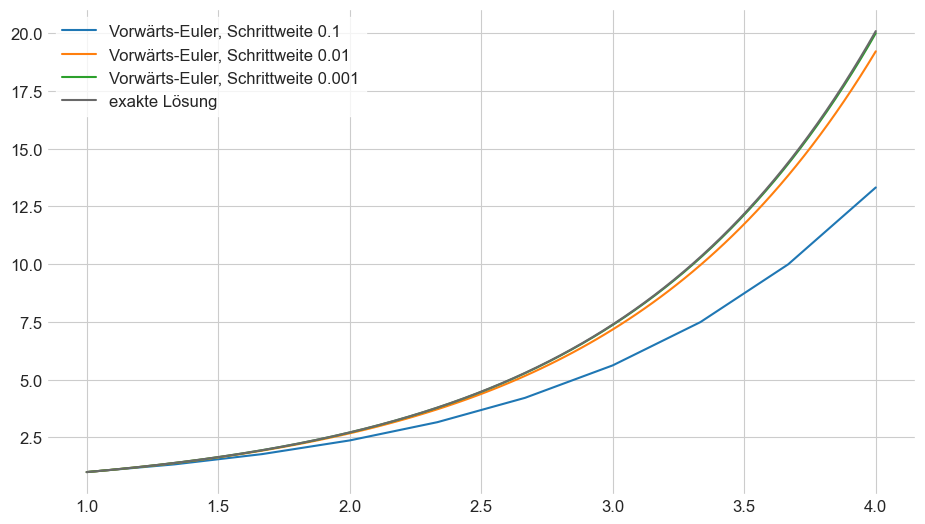

In [3]:
def f(t, y):
    return y

def exact(t):
    return np.exp(t-1)

def error(exact_vals, approx_vals):
    '''Maxmimum norm'''
    return max(np.abs(exact_vals - approx_vals).flatten())

def order(errors):
    '''Approximation of order of convergence'''
    return np.log(errors[-1] / errors[-2]) / np.log(steps[-2] / steps[-1])

y0 = 1
steps = 10**np.arange(1, 4)

errors = ()

for N in steps:
    t = np.linspace(1, 4, N)
    y = forwardEuler(f, y0, t)
    errors += (error(exact(t), y),)
    plt.plot(t, y, label=f"Vorwärts-Euler, Schrittweite {1/N}")
    
plt.plot(t, exact(t), color="dimgrey", label="exakte Lösung")
plt.legend()
plt.show()

In [4]:
for i, N in enumerate(steps):
    print(f"Fehler für Schrittweite {1/N}:\t {errors[i]:4.2f}")

print(f"\nApproximierte Konvergenzordnung: {order(errors):.2f}")

Fehler für Schrittweite 0.1:	 6.77
Fehler für Schrittweite 0.01:	 0.88
Fehler für Schrittweite 0.001:	 0.09

Approximierte Konvergenzordnung: 0.99


Man sieht, dass das Verfahren gegen die exakte Lösung strebt, wenn man die Schrittweite verkleinert. Wie in der analytische Betrachtung kommt man auch mit der Berechnung zum Schluss, dass die Konvergenz mit Ordnung 1 geschieht.

#### Qualitativer Test
Nun folgt die qualitative Probe vom Vorwärts-Euler-Verfahren anhand von einem Lotka-Volterra-System

\begin{cases}
    y_1'(t) = -(\alpha-\beta\ y_2(t))\ y1(t) \\
    y_2'(t) = (\gamma - \delta\ y_1(t))\ y_2(t) \\
    y_1(0) = 3,\ y_2(0) = 5
\end{cases}

für $\alpha = 1, \beta = 0.1, \gamma = 4$ und $\delta = 1,$ wobei $y_1$ die Zahl der Räuber und $y_2$ die Zahl der Beutetiere zur Zeit $t$ beschreibt.

Anstatt mit der exakten Lösung zu vergleichen, untersuchen wir, ob das Verfahren für die beiden Schrittweiten $0.1$ und $0.001$ die charakteristische Dynamik von dem Lotka-Volterra-System abbilden können.

Anzahl der Tiere zum Zeitpunkt 10:
-1.77e+57 Räuber
 1.77e+58 Beutetiere


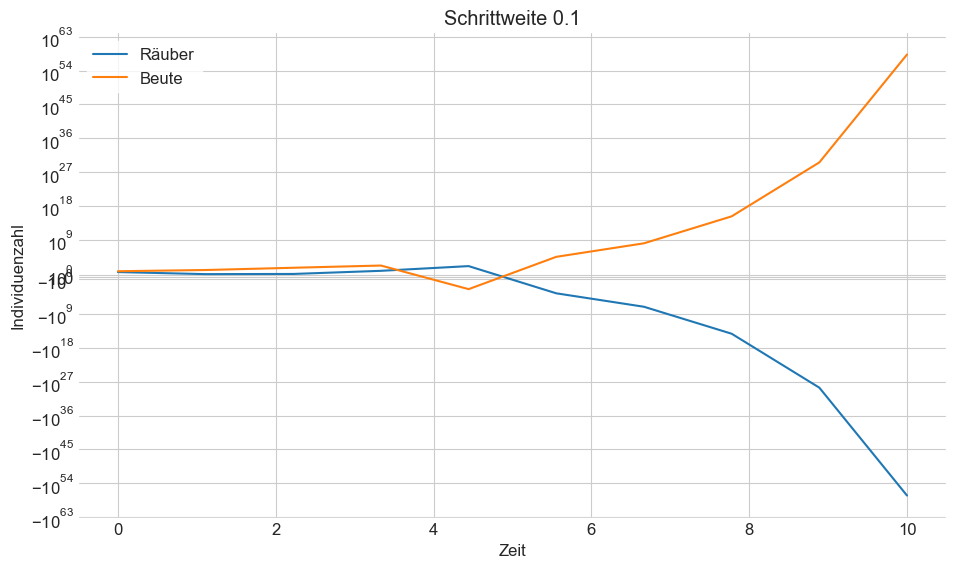

In [5]:
def f(t, y):
    y1, y2 = y
    return np.array([-(1 - 0.1 * y2) * y1, (4 - 1 * y1) * y2])

y0 = (3, 5)

t = np.linspace(0, 10, 10)
y = forwardEuler(f, y0, t)

print("Anzahl der Tiere zum Zeitpunkt 10:")
print(f"{y[-1, 0]:9.2e} Räuber")
print(f"{y[-1, -1]:9.2e} Beutetiere")

plt.plot(t, y[:, 0], label="Räuber")
plt.plot(t, y[:, 1], label="Beute")
plt.yscale("symlog")
plt.xlabel("Zeit")
plt.ylabel("Individuenzahl")
plt.title("Schrittweite 0.1")
plt.legend()
plt.show()

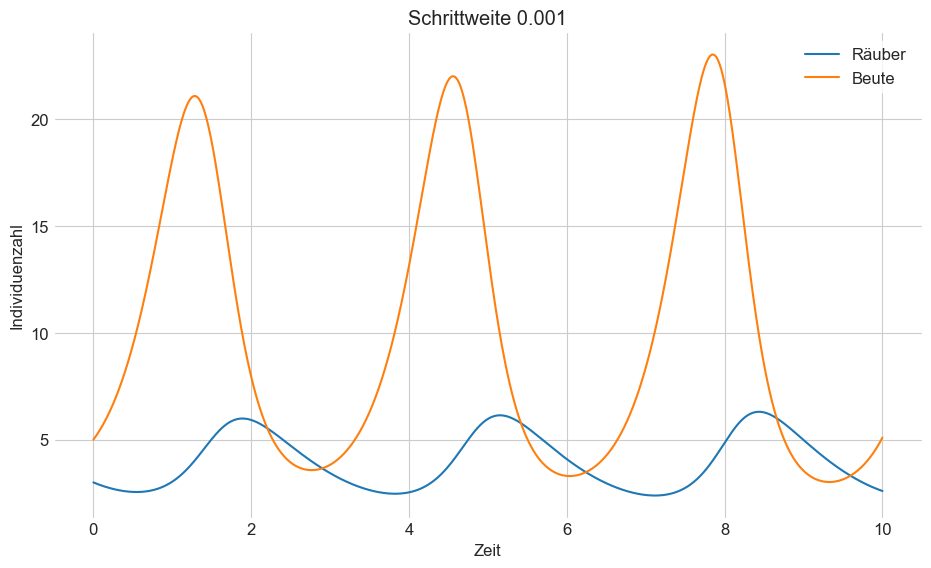

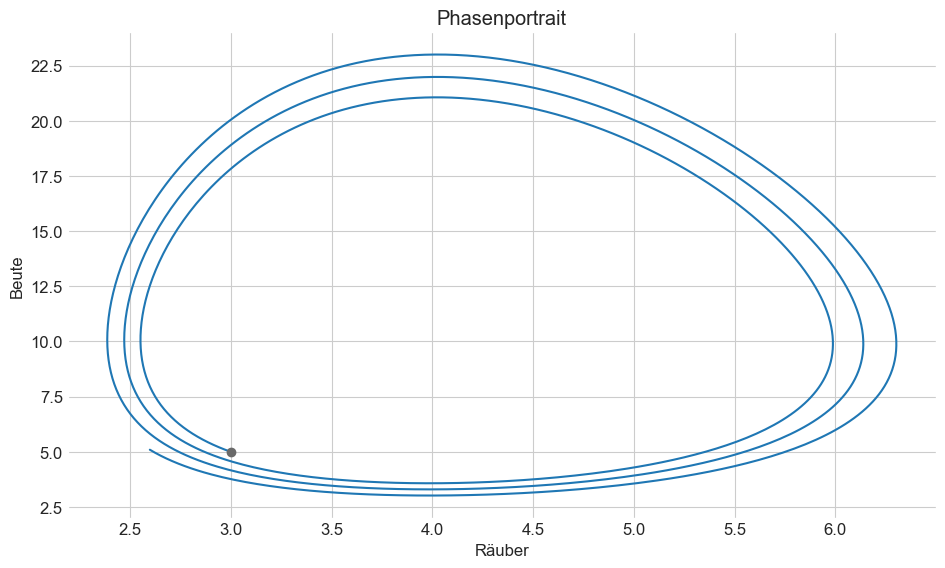

In [6]:
t = np.linspace(0, 10, 1000)
y = forwardEuler(f, y0, t)

plt.plot(t, y[:, 0], label="Räuber")
plt.plot(t, y[:, 1], label="Beute")
plt.xlabel("Zeit")
plt.ylabel("Individuenzahl")
plt.title("Schrittweite 0.001")
plt.legend()
plt.show()

plt.plot(y[:, 0], y[:, 1])
plt.plot(*y0, "o", color="dimgray")
plt.title("Phasenportrait")
plt.xlabel("Räuber")
plt.ylabel("Beute")
plt.show()

Bei einer Schrittweite von $0.1$ scheitert das Vorwärts-Euler-Verfahren, die korrekte Populationsdynamik des Räuber-Beute-Systems einzufangen und zeigt ein divergentes Verhalten auf. Zum Zeitpunkt 10 etwa progonstiziert das Verfahren ca. $-10^{57}$ Räuber und $10^{58}$ Beutetiere, was keine zu erwartenden Zahlen sind.

Bei einer Schrittweite von $0.001$ schafft das Verfahren die Dynamik halbwegs festzuhalten. Jedoch ist auch hier das periodische Verhalten nicht exakt getroffen, denn die "Peaks" der Populationen steigen mit jeder Periode, sollten aber eigentlich konstant bleiben. Im Phasenportrait sieht man, wie sich die Kurve nicht schließt, sondern nach außen wandert.

#### Fazit

Das Vorwärts-Euler-Verfahren ist leicht implementiert, benötigt wenig Rechenaufwand und liefert für einfache Probleme schnell gute Näherungen. Doch um das Verhalten komplexerer System zu erfassen, muss man entweder die Schrittweiten sehr stark verkleinern, was den Rechenaufwand erhöht, oder zu einem geeigneteren Verfahren greifen.